## Ассортимент магазина "Пока все еще тут"

[Презентация](https://yadi.sk/i/k3luKv4MyHUU8Q)

[Дашборд](https://public.tableau.com/profile/lev.eidelkind#!/vizhome/final-prjct/sheet2)

Исследование проводится по заказу менеджера магазина по ассортименту. Главная цель: выяснить, какие товары для магазина основные, какие - дополнительные.

## Содержание

### [Выгрузка и предобработка данных](#chapter1)
    А. Пропуски
    Б. Типы данных, названиями столбцов, дубликаты
     
     
### [Исследовательский анализ данных](#chapter2)
    А. Средний чек и распределение заказов по сумме
    Б. Количество покупок по неделям
    В. Количество уникальных покупателей по неделям
    Г. Исследование сезонности (зависят ли количество покупок, количество покупателей, средний чек от времени года)
    
### [Проверка статистических гипотез](#chapter3)


### [Категоризация](#chapter4)


### [Общие выводы и рекомендации](#chapter5)

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats as st

### Выгрузка и предобработка данных <a id="chapter1"></a>

In [2]:
from io import BytesIO
import requests
spreadsheet_id = "11hjYaGCi17kPLnwGCzWsVg2BY3j-__UWmH5tsLtTgrw"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
ecommerce = pd.read_csv(BytesIO(r.content))
display(ecommerce.head())

,date,customer_id,order_id,product,quantity,price;
0,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,""Комнатное растение в горшке Алое Вера, d12, h30"",1,142.0;",NaN,NaN,NaN,NaN,NaN
1,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,""Комнатное растение в горшке Кофе Арабика, d12, h25"",1,194.0;",NaN,NaN,NaN,NaN,NaN
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Радермахера d-12 см h-20 см,1.0,112.0;
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Хризолидокарпус Лутесценс d-9 см,1.0,179.0;
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Циперус Зумула d-12 см h-25 см,1.0,112.0;


In [3]:
print(ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   object 
 1   customer_id  4518 non-null   object 
 2   order_id     4518 non-null   float64
 3   product      4518 non-null   object 
 4   quantity     4518 non-null   float64
 5   price;       4518 non-null   object 
dtypes: float64(2), object(4)
memory usage: 315.9+ KB
None


#### Пропуски

Две тысячи с лишним строк распознались неправильно из-за того, что в них слишком много запятых, часть из которых являются разделителями, а другая часть - обычными запятыми в тексте названия продукта. В результате pandas не может правильно распределить данные по столбцам, записывая все в столбец date. Вероятно, решение этой проблемы поможет избавиться от пропусков.

Мы выделим в отдельный датафрейм эти строки, убрав их из таблицы ecommerce. Назовем его bad_lines.

Затем поработаем с ним методом split и выделим нужные столбцы, получим правильную версию этих строк - good_lines.

Затем конкатенируем good_lines и ecommerce.

In [4]:
# Датафрейм с плохими строками
bad_lines = ecommerce[ecommerce['quantity'].isna() == True]
bad_lines = bad_lines[['date']]
display(bad_lines.head())

,date
0,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,""Комнатное растение в горшке Алое Вера, d12, h30"",1,142.0;"
1,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,""Комнатное растение в горшке Кофе Арабика, d12, h25"",1,194.0;"
8,"2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,""Таз пластмассовый 21,0 л круглый """"Водолей"""" С614, 1404056"",1,269.0;"
10,"2018100111,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,""Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331"",10,82.0;"
11,"2018100112,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,""Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м"",1,614.0;"


In [5]:
# Уберем из ecommerce плохие строки
ecommerce = ecommerce.dropna()
display(ecommerce.head())

,date,customer_id,order_id,product,quantity,price;
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Радермахера d-12 см h-20 см,1.0,112.0;
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Хризолидокарпус Лутесценс d-9 см,1.0,179.0;
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Циперус Зумула d-12 см h-25 см,1.0,112.0;
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Шеффлера Лузеана d-9 см,1.0,164.0;
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477.0,Юкка нитчатая d-12 см h-25-35 см,1.0,134.0;


In [6]:
# Запишем в левую колонку таблицы bad_lines все, что слева от сочетания запятая-кавычка
bad_lines['left_column'] = [i.split(',\"')[0] for i in bad_lines['date']]
# в продукт - все, что слева от сочетания запятая-кавычка, но справа от сочетания кавычка-запятая
bad_lines['product'] = [i.split(',\"')[1].split('\",')[0] for i in bad_lines['date']]
# То, что справа от второй с конца запятой - 'quantity'
bad_lines['quantity'] = [i.split(',')[-2] for i in bad_lines['date']]
# То, что справа от первой с конца запятой - 'price;'
bad_lines['price;'] = [i.split(',')[-1] for i in bad_lines['date']]
# Исходные строки удаляем
bad_lines = bad_lines.drop('date', axis =1)
display(bad_lines.head())

,left_column,product,quantity,price;
0,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477","Комнатное растение в горшке Алое Вера, d12, h30",1,142.0;
1,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477","Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0;
8,"2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478","Таз пластмассовый 21,0 л круглый """"Водолей"""" С614, 1404056",1,269.0;
10,"2018100111,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483","Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.0;
11,"2018100112,86432d8d-b706-463b-bd5d-6a9e170daee3,68484","Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м",1,614.0;


Реанимировали столбцы product, "quantity" и "price;". Последний назвван так же, как в таблице ecommerce. Точку с запятой удалим после конкатенации с нормальной частью строк. Сейчас перейдем к тому, что попало в left_column.

In [7]:
# Методом split выделим из left_column столбцы data, column_id и order_id
bad_lines['date'] = [i.split(',')[0] for i in bad_lines['left_column']]
bad_lines['customer_id'] = [i.split(',')[1] for i in bad_lines['left_column']]
bad_lines['order_id'] = [i.split(',')[2] for i in bad_lines['left_column']]
display(bad_lines.head())

,left_column,product,quantity,price;,date,customer_id,order_id
0,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477","Комнатное растение в горшке Алое Вера, d12, h30",1,142.0;,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477
1,"2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477","Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0;,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477
8,"2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478","Таз пластмассовый 21,0 л круглый """"Водолей"""" С614, 1404056",1,269.0;,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478
10,"2018100111,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483","Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.0;,2018100111,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483
11,"2018100112,86432d8d-b706-463b-bd5d-6a9e170daee3,68484","Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м",1,614.0;,2018100112,86432d8d-b706-463b-bd5d-6a9e170daee3,68484


In [8]:
# И наконец получим датафрейм, который можно соединять с нормальными строками ecommerce
good_lines = bad_lines[['date', 'customer_id', 'order_id', 'product', 'quantity', 'price;']]
display(good_lines.head())

,date,customer_id,order_id,product,quantity,price;
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0;
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0;
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый """"Водолей"""" С614, 1404056",1,269.0;
10,2018100111,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.0;
11,2018100112,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,"Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м",1,614.0;


In [9]:
# Конкатенируем
ecommerce = pd.concat([ecommerce, good_lines]).reset_index(drop=True)
display(ecommerce.head())

,date,customer_id,order_id,product,quantity,price;
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0;
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0;
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0;
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0;
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0;


#### Типы данных и названия столбцов

In [10]:
# В столбце цена нужно избавиться от точки с запятой. А заодно и от нуля с точкой
ecommerce['price'] = [i.split('.')[0] for i in ecommerce['price;']]
del ecommerce['price;']

# Приведем данные к нужному типу
ecommerce.price = pd.to_numeric(ecommerce.price)
ecommerce.date = pd.to_datetime(ecommerce.date, format = '%Y%m%d%H')
ecommerce.order_id = ecommerce.order_id.astype('int')
ecommerce.quantity = ecommerce.quantity.astype('int')

ecommerce = ecommerce.sort_values(by='date').reset_index(drop=True)
display(ecommerce.head(10))

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164
7,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый """"Водолей"""" С614, 1404056",1,269
8,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674


In [11]:
print(ecommerce.info())
print(ecommerce.date.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int32         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int32         
 5   price        6737 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 263.3+ KB
None
2019-10-31 16:00:00


In [12]:
# Есть ли дубликаты?
print(ecommerce.duplicated().sum())
# Есть ли скрытые дубликаты? Возьмем датафрейм без дат и id заказчика
without_date_and_customer = ecommerce.drop(['date', 'customer_id'], axis=1)
print(without_date_and_customer.duplicated().sum())

0
1897


In [13]:
# Вот как выглядят наши дубликаты
duplicates = without_date_and_customer[without_date_and_customer.duplicated() == True]
display(duplicates.head())

,order_id,product,quantity,price
57,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299
59,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299
60,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299
63,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299
94,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409


Обнаружено 1897 скрытых дубликатов. Если бы у нас была таблица заказов, то номер заказа был бы уникальным ключом, но у нас таблица подытогов по каждой товарной позиции в чеке, поэтому сами по себе номера заказов должны повторяться. Комбинация "номер заказа - наименование товара - количество - цена" должно быть уникальным, но могло продублироваться из-за того, что в таблицу попали сведения по разным операциям из разных баз (типа "заказ оформлен", "товар отгружен", "товар доставлен" итп), при этом id заказчика может теоретически в разных базах оказаться разным. Поэтому мы взяли для отсечения дубликатов именно такую комбинацию (без даты и id заказчика). Тепрь избавимся от обнаруженных дубликатов и соединим получившуюся таблицу с датой и id заказчика.

In [14]:
dates_and_customers = ecommerce[['date', 'customer_id']]
without_date_and_customer = without_date_and_customer.drop_duplicates()
# Таблица данных без дубликатов - e_commerce
e_commerce = dates_and_customers.join(without_date_and_customer, how='inner')
print(e_commerce.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 6735
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4840 non-null   datetime64[ns]
 1   customer_id  4840 non-null   object        
 2   order_id     4840 non-null   int32         
 3   product      4840 non-null   object        
 4   quantity     4840 non-null   int32         
 5   price        4840 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 226.9+ KB
None


In [15]:
e_commerce = e_commerce.reset_index(drop=True)

In [16]:
e_commerce.duplicated().sum()

0

Типы данных изменили, переименовали один столбец, дубликаты удалили. Пропусков нет.

### Исследовательский анализ данных <a id="chapter2"></a>

In [17]:
# Добавим столбцы года, месяца, недели и дня
e_commerce['year'] = e_commerce['date'].dt.year
e_commerce['month'] = e_commerce['date'].dt.month
e_commerce['day'] = e_commerce['date'].dt.date
e_commerce['week'] = e_commerce['date'].dt.week

# По каждой позиции чека вычислим подытог - произведение цены товара и его количества
e_commerce['subtotal'] = e_commerce.quantity * e_commerce.price
display(e_commerce.head(10))

,date,customer_id,order_id,product,quantity,price,year,month,day,week,subtotal
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112,2018,10,2018-10-01,40,112
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194,2018,10,2018-10-01,40,194
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134,2018,10,2018-10-01,40,134
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142,2018,10,2018-10-01,40,142
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112,2018,10,2018-10-01,40,112
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179,2018,10,2018-10-01,40,179
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164,2018,10,2018-10-01,40,164
7,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый """"Водолей"""" С614, 1404056",1,269,2018,10,2018-10-01,40,269
8,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824,2018,10,2018-10-01,40,824
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674,2018,10,2018-10-01,40,674


#### Средний чек и распределение заказов по сумме

In [18]:
# Таблица чеков - сумма подытогов по каждому заказу
checks = e_commerce.groupby('order_id').agg({'subtotal': 'sum'})
checks = checks.rename(columns={'subtotal': 'total'})
display(checks.head())

,total
order_id,
12624,375
13547,684
14480,359
14481,600
14482,376


In [19]:
print('Средний чек за весь период наблюдений: ', end ='')
print(np.round(checks.total.mean(), 2))

Средний чек за весь период наблюдений: 1478.68


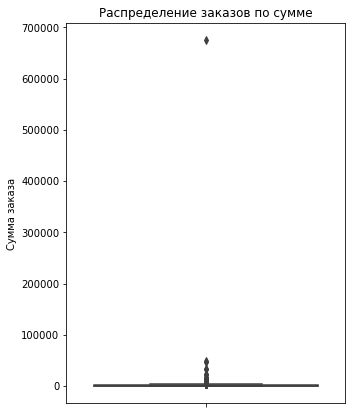

In [20]:
# Диаграмма размаха: распределение заказов по сумме
plt.figure(figsize=(5,7))
sns.boxplot(data=checks, y = 'total')
plt.title('Распределение заказов по сумме')
plt.ylabel("Сумма заказа")
plt.show()

Есть очень сильный выброс в районе 700000 за заказ. Сделаем другую диаграмму с ограничением по оси y.

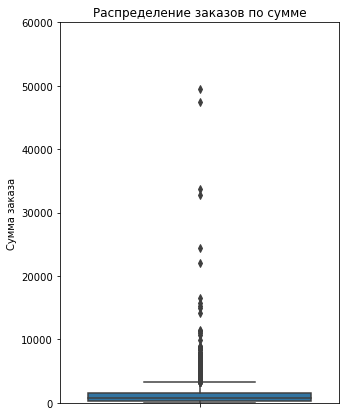

In [21]:
plt.figure(figsize=(5,7))
sns.boxplot(data=checks, y = 'total')
plt.ylim(0, 60000)
plt.title("Распределение заказов по сумме")
plt.ylabel('Сумма заказа')
plt.show()

Очевидно, выбросов на самом деле гораздо больше. Подавляющее большинство заказов не выходят за пределы двух-трех тысяч. Точнее посмотрим по квантилям.

In [22]:
print("Сумма трех четвертей заказов не превышает ", end='')
print(np.quantile(checks.total, 0.75))
print()
print("Сумма 90 % заказов не превышает ", end='')
print(np.quantile(checks.total, 0.90))

Сумма трех четвертей заказов не превышает 1470.0

Сумма 90 % заказов не превышает 2774.0


#### Количество заказов и количество покупателей по неделям

In [23]:
# Количество уникальных покупателей и уникальных заказов по неделям 
by_week = e_commerce.groupby(['year', 'week'], as_index = False).agg({'customer_id': 'nunique', 'order_id': 'nunique'})
by_week = by_week.rename(columns = {'customer_id': 'num_customers', 'order_id': 'num_orders'})
display(by_week.head())

,year,week,num_customers,num_orders
0,2018,40,48,59
1,2018,41,48,65
2,2018,42,34,47
3,2018,43,44,51
4,2018,44,41,44


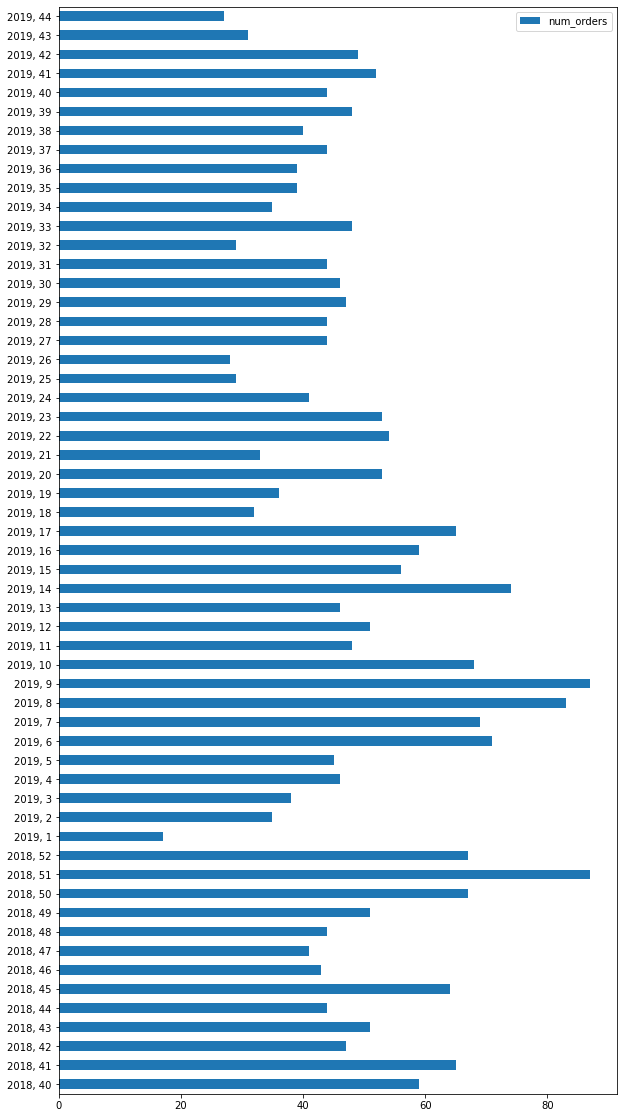

In [24]:
# График количества заказов по неделям
ax = by_week.plot(kind = 'barh', y = 'num_orders', figsize = (10, 20))
labels = []
for row in range(len(by_week)):
    label = str(by_week['year'][row]) + ', ' + str(by_week['week'][row])
    labels.append(label)
ax.set_yticklabels(labels)
plt.show()

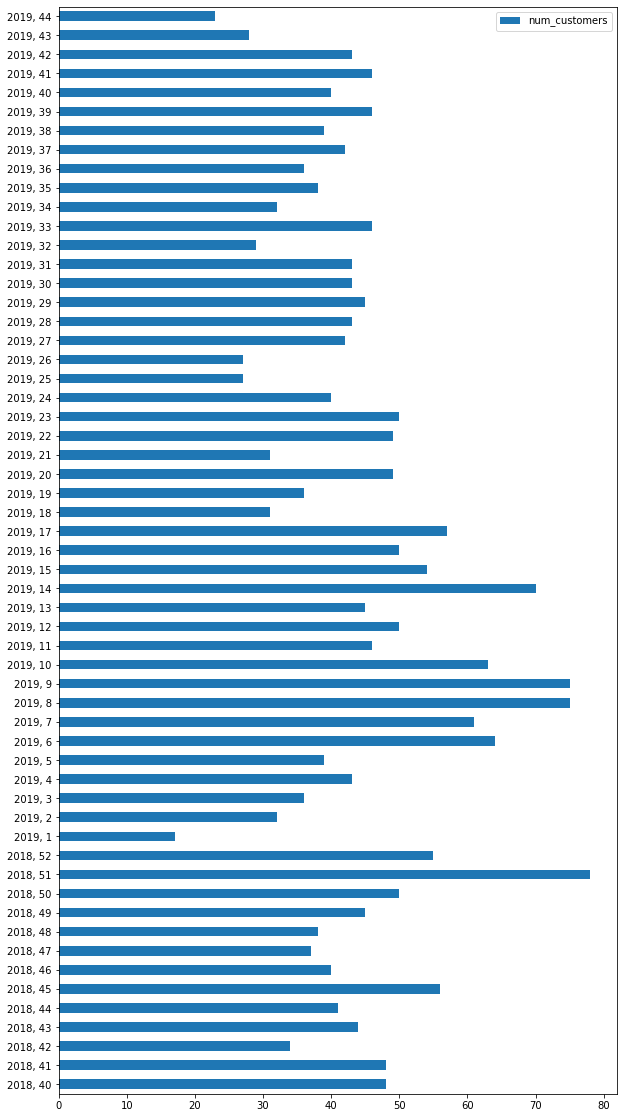

In [25]:
# График количества покупателей по неделям
ax = by_week.plot(kind = 'barh', y = 'num_customers', figsize = (10, 20))
labels = []
for row in range(len(by_week)):
    label = str(by_week['year'][row]) + ', ' + str(by_week['week'][row])
    labels.append(label)
ax.set_yticklabels(labels)
plt.show()

Количество покупателей и количество заказов серьезно колеблется от недели к недели. Иногда это можно объяснить тем или иным событием. Например, перед Новым годом  много покупок, а сразу после - наоборот, очень мало. Посмотрим, как зависят метрики от времени года.

#### Сезонность

In [26]:
# Количество покупателей и заказов и суммарный доход по месяцам
by_month = e_commerce.groupby(['year', 'month'], as_index = False).agg({'customer_id': 'nunique', 'order_id': 'nunique', 'subtotal': 'sum'})
by_month = by_month.rename(columns = {'customer_id': 'num_customers', 'order_id': 'num_orders', 'subtotal': 'total_income'})
# Средний чек для каждого месяца
by_month['avg_check'] = np.round ((by_month.total_income / by_month.num_orders), 2)

display(by_month)

,year,month,num_customers,num_orders,total_income,avg_check
0,2018,10,180,239,351536,1470.86
1,2018,11,178,204,359348,1761.51
2,2018,12,234,284,354566,1248.47
3,2019,1,150,166,230934,1391.17
4,2019,2,246,288,306442,1064.03
5,2019,3,233,248,254320,1025.48
6,2019,4,238,267,317602,1189.52
7,2019,5,169,183,240451,1313.94
8,2019,6,153,162,904575,5583.80
9,2019,7,186,198,235410,1188.94


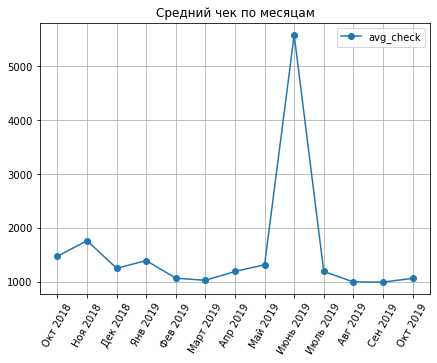

In [27]:
# График среднего чека по месяцам
ax = by_month.plot(y = 'avg_check', style = '-o', grid=True, figsize=(7,5))
plt.xticks(range(13))
ax.set_xticklabels(['Окт 2018', 'Ноя 2018', 'Дек 2018', 'Янв 2019', 'Фев 2019', 'Март 2019', 'Апр 2019', 'Май 2019', 'Июнь 2019', 'Июль 2019', 'Авг 2019', 'Сен 2019', 'Окт 2019'], rotation = 60)
plt.title('Средний чек по месяцам')
plt.show()

Средний чек подскочил в июне, но это влияние выбросов, которые мы видели на диаграмме размаха. В остальном, кажется, речь идет не столько о сезонности, сколько о постепенном ухудшении ситуации: два октября отличаются друг от друга сильнее, чем октябрь 2019 от апреля 2019 года. Но не исключено, что весенний спад отчасти объясняется сезонностью.

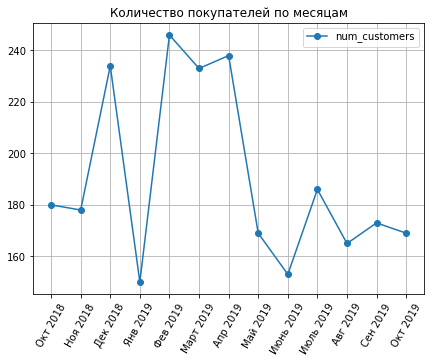

In [28]:
# График количества покупателей по месяцам
ax = by_month.plot(y = 'num_customers', style = '-o', grid=True, figsize=(7,5))
plt.xticks(range(13))
ax.set_xticklabels(['Окт 2018', 'Ноя 2018', 'Дек 2018', 'Янв 2019', 'Фев 2019', 'Март 2019', 'Апр 2019', 'Май 2019', 'Июнь 2019', 'Июль 2019', 'Авг 2019', 'Сен 2019', 'Окт 2019'], rotation = 60)
plt.title('Количество покупателей по месяцам')
plt.show()

Любопытно, что покупателей весной, напртив, стало больше. Однако глядя на октябрь к октябрю, мы видим все тот же общий спад.

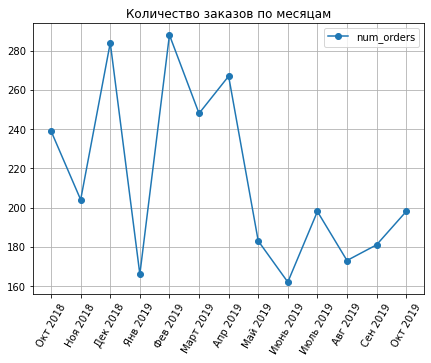

In [29]:
# График количества заказов по месяцам
ax = by_month.plot(y = 'num_orders', style = '-o', grid=True, figsize=(7,5))
plt.xticks(range(13))
ax.set_xticklabels(['Окт 2018', 'Ноя 2018', 'Дек 2018', 'Янв 2019', 'Фев 2019', 'Март 2019', 'Апр 2019', 'Май 2019', 'Июнь 2019', 'Июль 2019', 'Авг 2019', 'Сен 2019', 'Окт 2019'], rotation = 60)
plt.title('Количество заказов по месяцам')
plt.show()

График заказов в целом повторяет траекторию графика покупателей.

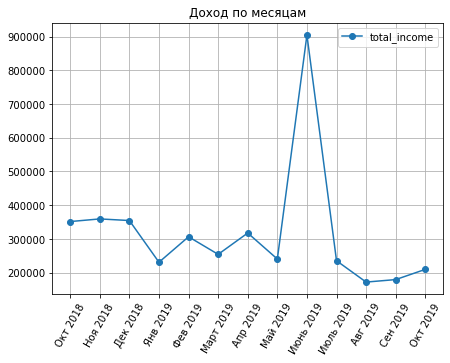

In [30]:
# График дохода по месяцам
ax = by_month.plot(y = 'total_income', style = '-o', grid=True, figsize=(7,5))
plt.xticks(range(13))
ax.set_xticklabels(['Окт 2018', 'Ноя 2018', 'Дек 2018', 'Янв 2019', 'Фев 2019', 'Март 2019', 'Апр 2019', 'Май 2019', 'Июнь 2019', 'Июль 2019', 'Авг 2019', 'Сен 2019', 'Окт 2019'], rotation = 60)
plt.title('Доход по месяцам')
plt.show()

Доход по месяцам показывает, что речь идет о планомерном ухудшении, которое было прервано временно в июне - в следствие одного-двух аномальных заказов.

### Гипотезы <a id="chapter3"></a>

Исследуя данные, мы обнаружили спад всех метрик - октябрь к октябрю. Проверим, можно ли считать различия между двумя октябрями статистически значимыми.
Проверим две гипотезы:

1) Среднее количество заказов в день в октябре 2019 года значимо изменилось по сравнению с октябрем 2018.

2) Средний чек октября 2019 года значимо отличается от среднего чека октября 2018.

Сначала удалим выбросы. Каждое статистическое исследование будем предварять проверкой распределений на нормальность.

#### Выбросы

In [31]:
# Посмотрим на наиболее доходные подытоги товарных позиций
e_commerce = e_commerce.sort_values(by= 'subtotal', ascending = False).reset_index(drop=True)
display(e_commerce.head(10))

,date,customer_id,order_id,product,quantity,price,year,month,day,week,subtotal
0,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675,2019,6,2019-06-18,25,675000
1,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148,2019,6,2019-06-11,24,49432
2,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755,2019,1,2019-01-15,3,47385
3,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,57,574,2018,12,2018-12-21,51,32718
4,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457,2018,11,2018-11-29,48,29248
5,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная """"Гео""",5,4874,2018,11,2018-11-06,45,24370
6,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,3,5512,2019,2,2019-02-04,6,16536
7,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568,2019,4,2019-04-19,16,15680
8,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51,2019,5,2019-05-20,21,15300
9,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917,2019,7,2019-07-29,31,14917


Аномальными будем считать те подытоги, для которых соблюдается одновременно два условия: они больше, чем 99% остальных, и при этом количество купленного товара для данного подытога также больше, чем для 99% остальных. То есть те случаи, когда подытог велик только потому, что товар сам по себе дорогой - будем считать нормальными. Если покупают много, но подытог остается в пределах нормы, значит товар относительно дешев, и это нормально.

In [32]:
max_subtotal = np.quantile(e_commerce.subtotal, 0.99)
print(max_subtotal)
max_quantity = np.quantile(e_commerce.quantity, 0.99)
print(max_quantity)

6148.61
30.0


In [33]:
# Подытог, удовлетворяющий хотя бы одному условию, - нормальный
e_commerce = e_commerce.query('subtotal <= @max_subtotal or quantity <= @max_quantity').reset_index(drop=True)
display(e_commerce.head())

,date,customer_id,order_id,product,quantity,price,year,month,day,week,subtotal
0,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755,2019,1,2019-01-15,3,47385
1,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная """"Гео""",5,4874,2018,11,2018-11-06,45,24370
2,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,3,5512,2019,2,2019-02-04,6,16536
3,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568,2019,4,2019-04-19,16,15680
4,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917,2019,7,2019-07-29,31,14917


#### Первая гипотеза

In [34]:
# Срезы данных по октябрям
october_18 = e_commerce.query('(month == 10) and (year == 2018)').reset_index(drop=True)
october_19 = e_commerce.query('(month == 10) and (year == 2019)').reset_index(drop=True)

# Заказы по суммам для октябрей
checks_oct_18 = october_18.groupby('order_id', as_index = False).agg({'subtotal': 'sum'})
checks_oct_18 = checks_oct_18.rename(columns = {'subtotal': 'total'})

checks_oct_19 = october_19.groupby('order_id', as_index = False).agg({'subtotal': 'sum'})
checks_oct_19 = checks_oct_19.rename(columns = {'subtotal': 'total'})

In [35]:
display(checks_oct_18.head())
print()
print('Средний чек для октября 2018 года: ', end='')
print(np.round(checks_oct_18.total.mean(), 2))

,order_id,total
0,13547,684
1,14480,359
2,14481,600
3,14482,376
4,14485,676



Средний чек для октября 2018 года: 1445.64


In [36]:
# Нормальное ли распределение заказов по сумме для октября 18-го? Нулевая гипотеза - распределение нормальное
results = st.shapiro(checks_oct_18.total)
p_value = results[1]
print(p_value)
# Уровень значимости
print(p_value < 0.05)

1.2218916038229528e-24
True


P-значение меньше уровня статистической значимости. Нулевую гипотезу можно отвергнуть, распределение - не нормальное.

In [37]:
display(checks_oct_19.head())
print()
print('Средний чек для октября 2019 года: ', end='')
print(np.round(checks_oct_19.total.mean(), 2))

,order_id,total
0,14939,646
1,14940,135
2,14941,1699
3,14942,270
4,14943,555



Средний чек для октября 2019 года: 1059.72


In [38]:
# Проверяем на нормальность распределение заказов по сумме для октября 2019.
results = st.shapiro(checks_oct_19.total)
p_value = results[1]
print(p_value)
print(p_value < 0.05)

1.1765960755585697e-18
True


P-значение меньше уровня статистической значимости. Нулевую гипотезу можно отвергнуть, распределение - не нормальное.

Сравним средние чеки двух октябрей. Распределения не нормальны, поэтому будем использовать тест Манна-Уитни.

Нулевая гипотеза: между средними чеками двух октябрей нет статистически значимых различий (найенная разница случайна).
Альтернативная гипотеза: Различия между средними чеками статистически значимы.
Уровень статистической значимости 0.05.

In [39]:
results = st.mannwhitneyu(checks_oct_19.total, checks_oct_18.total)
print(results.pvalue < 0.05)

True


Отвергаем нулевую гипотезу, p-значение меньше уровня стат. значимости. Средние чеки значимо различаются.

#### Вторая гипотеза

In [40]:
# Количество заказов по дням
orders_oct_18 = october_18.groupby('day', as_index = False).agg({'order_id': 'nunique'})
orders_oct_19 = october_19.groupby('day', as_index = False).agg({'order_id': 'nunique'})  
orders_oct_18 = orders_oct_18.rename(columns = {'order_id': 'num_orders'})
orders_oct_19 = orders_oct_19.rename(columns = {'order_id': 'num_orders'})

In [41]:
display(orders_oct_18.head())
print("Среднее число заказов в день в октябре 2018 года: ", end = '')
print(np.round(orders_oct_18.num_orders.mean(),2))

,day,num_orders
0,2018-10-01,11
1,2018-10-02,14
2,2018-10-03,7
3,2018-10-04,11
4,2018-10-05,7


Среднее число заказов в день в октябре 2018 года: 7.71


In [42]:
# Проверим выборку на нормальность
results = st.shapiro(orders_oct_18.num_orders)
p_value = results[1]
print(p_value)
print(p_value < 0.05)

0.47150611877441406
False


P-значение превысило уровень стат. значимости. Нельзя отвергнуть нулевую гипотезу: распределение нормально.

In [43]:
display(orders_oct_19.head())
print("Среднее число заказов в день в октябре 2019 года: ", end = '')
print(np.round(orders_oct_19.num_orders.mean(), 2))

,day,num_orders
0,2019-10-01,9
1,2019-10-02,6
2,2019-10-03,3
3,2019-10-04,6
4,2019-10-05,5


Среднее число заказов в день в октябре 2019 года: 6.39


In [44]:
# Проверим нормальность распределения
results = st.shapiro(orders_oct_19.num_orders)
p_value = results[1]
print(p_value)
print(p_value < 0.05)

0.0003052564861718565
True


P-значение оказалось меньше уровня статистической значимости. Отвергаем нулевeю гипотезу. Распределение второй выборки не нормально. Будем использовать тест Манна-Уитни.


Нулевая гипотеза: среднее число заказов в день в октябре 2018 значимо не отличается от такового в октябре 2019.
Альтернативная гипотеза: среднее число заказов в день в эти два месяца различается значимо.

In [45]:
results = st.mannwhitneyu(orders_oct_19.num_orders, orders_oct_18.num_orders)
print(results.pvalue < 0.05)

True


P-значение меньше уровня статистической значимости. Отвергаем нулевую гипотезу. Число заказов в день в октябре 2019 значимо отличается от числа заказов вдень в 2018 году.

### Категоризация продуктов <a id="chapter4"></a>

Для категоризации посмотрим на какие группы делятся продукты по соотношению дохода, который они приносят за год, и количества покупателей, которые их покупают. Для этого сделаем соответствующую диаграмму рассеяния.

In [46]:
# Таблица всех метрик по продуктам: количество покупателей, заказов, проанных экземпляров, доход от товарв за весь период
# Отсортируем по доходу
by_product = e_commerce.groupby('product', as_index = False).agg({'customer_id': 'nunique', 'order_id': 'nunique', 'quantity': 'sum', 'subtotal': 'sum'})
by_product = by_product.rename(columns = {'customer_id': 'num_customers', 'order_id': 'num_orders', 'subtotal': 'total'}).sort_values(by = 'total', ascending=False).reset_index(drop=True)
display(by_product.head(10))

,product,num_customers,num_orders,quantity,total
0,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,1,2,30,53232
1,Сумка-тележка 2-х колесная Gimi Argo синяя,43,47,47,50405
2,"Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90",5,5,5,28045
3,"Урна уличная """"Гео""",1,1,5,24370
4,"Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204",2,2,37,20010
5,Сумка-тележка 3-х колесная Gimi Tris Floral синяя,7,7,7,18893
6,"Сумка-тележка хозяйственная Andersen Treppensteiger Scala Shopper, Hera, черная 119-004-80",3,3,3,18560
7,"Сумка-тележка хозяйственная Andersen Scala Shopper, Lini, синяя 112-108-90",3,4,4,18296
8,Сумка-тележка 2-х колесная складная Gimi Flexi зеленая,10,10,11,18139
9,Гладильная доска НИКА BLUES 124х46 см 5757,7,7,7,17786


In [47]:
by_product.shape

(2340, 5)

In [48]:
# Матрица корреляций
by_product.corr()

,num_customers,num_orders,quantity,total
num_customers,1.000000,0.997633,0.348717,0.335871
num_orders,0.997633,1.000000,0.349199,0.342789
quantity,0.348717,0.349199,1.000000,0.245425
total,0.335871,0.342789,0.245425,1.000000


Корреляция между доходностью товара и числом покупателей, предъявляющих спрос на него есть, но слабая.

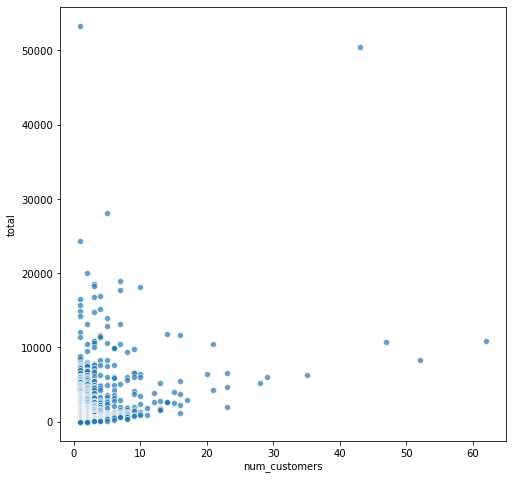

In [49]:
plt.figure(figsize = (8, 8))
#plt.ylim(0, 30000)
sns.scatterplot(data = by_product, x = 'num_customers', y = 'total', alpha = 0.7)
plt.show()

По диаграмме можно выделить следующие группы товаров: дорогие - те, которые стоят дороже 12000; эксклюзивные - которые были куплены более чем десятью покупателями в течение года, но не слишком дорогие; среднедоходные, которые были куплены не более, чем десятью покупателями и принесли от 5 до 12 тысяч; и малодоходные - те, которые были куплены не более, чем десятью покупателями и при этом принесли не более 5000 дохода.

In [50]:
part_1 = by_product.query('total <= 5000 and num_customers <= 10').reset_index(drop=True)
part_2 = by_product.query('5000 < total <= 12000 and num_customers <= 10').reset_index(drop=True)
part_3 = by_product.query('total <= 12000 and num_customers > 10').reset_index(drop=True)
part_4 = by_product.query('total > 12000').reset_index(drop=True)

In [51]:
display(part_4)

,product,num_customers,num_orders,quantity,total
0,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,1,2,30,53232
1,Сумка-тележка 2-х колесная Gimi Argo синяя,43,47,47,50405
2,"Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90",5,5,5,28045
3,"Урна уличная """"Гео""",1,1,5,24370
4,"Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204",2,2,37,20010
5,Сумка-тележка 3-х колесная Gimi Tris Floral синяя,7,7,7,18893
6,"Сумка-тележка хозяйственная Andersen Treppensteiger Scala Shopper, Hera, черная 119-004-80",3,3,3,18560
7,"Сумка-тележка хозяйственная Andersen Scala Shopper, Lini, синяя 112-108-90",3,4,4,18296
8,Сумка-тележка 2-х колесная складная Gimi Flexi зеленая,10,10,11,18139
9,Гладильная доска НИКА BLUES 124х46 см 5757,7,7,7,17786


In [52]:
display(part_3)

,product,num_customers,num_orders,quantity,total
0,Тележка багажная DELTA ТБР-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ,14,16,17,11749
1,Тележка багажная DELTA ТБР-20 синий грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ,16,16,16,11725
2,Пеларгония розебудная Red Pandora укорененный черенок,62,65,81,10923
3,Пеларгония зональная диам. 12 см сиреневый полумахровый,47,52,63,10780
4,Пеларгония зональная диам. 12 см красная махровая,21,21,63,10514
5,Пеларгония розебудная Prins Nikolai укорененный черенок,52,55,62,8358
6,Пеларгония зональная махровая лососевая,23,24,38,6537
7,"Однолетнее растение Петуния махровая в кассете 4 шт, Россия",20,21,78,6412
8,Пеларгония розебудная Mary укорененный черенок,35,39,47,6336
9,Пеларгония розебудная Margaretha укорененный черенок,29,29,45,6078


В третью группу попали два товара (первые два) больше похожие на товары четвертой - две багажные тележки. Принудительно перенесем их в четвертую, тогда в третьей будут только цветы, рассада и т.п.

In [53]:
part_4 = pd.concat([part_4, part_3.loc[:1]]).reset_index(drop=True)
part_3 = part_3.loc[2:].reset_index(drop=True)
display(part_4.tail(2))
display(part_3.head())

,product,num_customers,num_orders,quantity,total
23,Тележка багажная DELTA ТБР-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ,14,16,17,11749
24,Тележка багажная DELTA ТБР-20 синий грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ,16,16,16,11725


,product,num_customers,num_orders,quantity,total
0,Пеларгония розебудная Red Pandora укорененный черенок,62,65,81,10923
1,Пеларгония зональная диам. 12 см сиреневый полумахровый,47,52,63,10780
2,Пеларгония зональная диам. 12 см красная махровая,21,21,63,10514
3,Пеларгония розебудная Prins Nikolai укорененный черенок,52,55,62,8358
4,Пеларгония зональная махровая лососевая,23,24,38,6537


In [54]:
display(part_2.head(20))

,product,num_customers,num_orders,quantity,total
0,"Сумка-тележка хозяйственная Rolser Jet Joy синяя, JET001 azul JOY",4,4,4,11696
1,Гладильная доска НИКА LORA FASHION HLF 123х46 см,4,6,6,11546
2,Скатерть круглая d-175 см 50% полиэстер 50% хлопок белая Wellness MLd-187-Эстель*01,1,1,10,11400
3,Сумка-тележка 2-х колесная Gimi Galaxy голубая,4,4,4,11396
4,Сушилка для белья Gimi Dinamik 30,3,4,4,10796
5,Сумка-тележка 3-х колесная Gimi Tris красная,3,3,4,10796
6,Полки QWERTY Торонто белый 40х10 см 35х10 см 30х10 см 25х10 см 72015,3,3,3,10572
7,Чехол для гладильной доски Attribute METAL 140х60 см ABM106,5,5,14,10530
8,"Сумка-тележка хозяйственная Andersen Scala Shopper, Petit, черная 112-010-80",2,2,2,10498
9,Муляж Яблоко зеленый 9 см полиуретан,7,7,188,10492


In [55]:
display(part_1.head(20))

,product,num_customers,num_orders,quantity,total
0,Муляж Лимон желтый 9 см полиуретан,5,5,92,4998
1,Сумка-тележка хозяйственная Rolser IMX001 negro Convert RG черная,1,1,1,4957
2,Сумка-тележка хозяйственная Rolser BAB008 marengo JOY-1800 серая,1,1,1,4949
3,Стремянка алюминиевая Hailo 4302-301 LivingStep Comfort PLus 2 ступенчатая алюминиевая,1,1,1,4949
4,"Коврик придверный MOHAWK Mansonry Foliage Листопад 58,5х89 см 5412",3,3,3,4947
5,Тележка багажная DELTA ТБР-23 грузоподъемность 50 кг РОССИЯ,4,5,5,4947
6,Сумка-тележка хозяйственная GIMI Ideal серая (tortora),3,3,3,4947
7,"Коврик придверный с дизайном, из резины и кокоса 58,5*89 Gothic Iron Slice / Готический Узор, 4468",3,3,3,4926
8,"Декоративная композиция искуственных цветов Букет Роз три цветка, цвет в ассортименте 105 см",1,1,25,4900
9,"Сушилка для белья потолочная Лиана 2,2 м 1703010",6,6,7,4879


In [56]:
# Запишем категории продуктов в специальный столбец
e_commerce['product_category'] = None
for row in range(len(e_commerce)):
    if e_commerce['product'][row] in part_1['product'].unique():
        e_commerce['product_category'][row] = 'малодоходные'
    elif e_commerce['product'][row] in part_2['product'].unique():
        e_commerce['product_category'][row] = 'среднедоходные'
    elif e_commerce['product'][row] in part_3['product'].unique():
        e_commerce['product_category'][row] = 'эксклюзивные'
    elif e_commerce['product'][row] in part_4['product'].unique():
        e_commerce['product_category'][row] = 'доходные'
        
display(e_commerce.head(10))

,date,customer_id,order_id,product,quantity,price,year,month,day,week,subtotal,product_category
0,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755,2019,1,2019-01-15,3,47385,доходные
1,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная """"Гео""",5,4874,2018,11,2018-11-06,45,24370,доходные
2,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,3,5512,2019,2,2019-02-04,6,16536,доходные
3,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568,2019,4,2019-04-19,16,15680,доходные
4,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917,2019,7,2019-07-29,31,14917,доходные
5,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,"Наматрацник Natures Бархатный бамбук ББ-Н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый",12,1183,2019,4,2019-04-19,16,14196,доходные
6,2019-06-04 07:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,Скатерть круглая d-175 см 50% полиэстер 50% хлопок белая Wellness MLd-187-Эстель*01,10,1140,2019,6,2019-06-04,23,11400,среднедоходные
7,2019-02-07 09:00:00,af4d270b-c7ae-4af5-9582-4e61ff08eff0,70135,"Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204",20,550,2019,2,2019-02-07,6,11000,доходные
8,2018-10-23 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204",17,530,2018,10,2018-10-23,43,9010,доходные
9,2019-06-12 09:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71685,Скатерть 180 см WELLNESS WTd180-Лион*01 100% полиэстер,8,1104,2019,6,2019-06-12,24,8832,среднедоходные


In [57]:
# Посмотрим сколько всего магазин зарабатывает на разных категориях
income_per_category = e_commerce.groupby('product_category').agg({'subtotal': 'sum'})
income_per_category = income_per_category.rename(columns = {'subtotal': 'total'})
display(income_per_category)

,total
product_category,
доходные,481157
малодоходные,1868817
среднедоходные,781765
эксклюзивные,136103


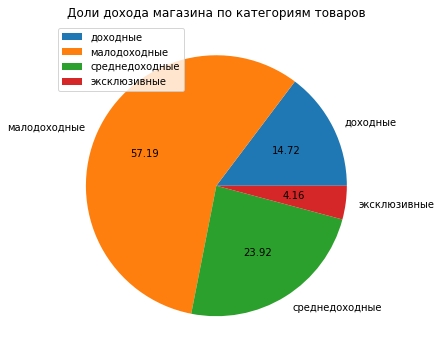

In [58]:
income_per_category.plot(kind = 'pie', y = 'total', autopct = '%.2f', figsize=(6,6))
plt.title("Доли дохода магазина по категориям товаров")
plt.ylabel('')
plt.show()

Итак, больше всего дохода (57 процентов) магазин получает с тех товаров, которые каждый в отдельности приносит мало дохода, - с дешевых товаров, которые при этом мало покупают. Эксклюзивные товары, на которые есть хороший спрос, за которыми приходят специально в этот магазин, приносят мало дохода (4%), потому что их очень мало. Кажется, этот вывод хорошо согласуется с тем, что дела у магазина в целом плохи - мало покупателей.  По этим данным трудно сказать, почему. По тем товарам, которых в магазине много, магазин проигрывает конкуренцию. Неудачная рекламная кампания? Вероятно, стоило бы попытаться сделать основной категорией товаров - эксклюзивные, нужно расширить их число.

### Общие выводы <a id="chapter5"></a>

Основной ассортимент: условное название «товары для сада и огорода» (цветы, растения, рассады и т.п.)

Дополнительный ассортимент: хозяйственные товары («товары для дома», т.е. посуда, сумки-тележки, сушилки, гладильные доски, вантузы ит.д.)

Спрос на товары магазина - маленький. Товара, который стоило бы сделать основной частью ассортимента (редкие цветы, рассада) - мало.

За 13 месяцев все метрики значимо упали, средний чек - стал меньше в полтора раза.

На данный момент большая часть доходов магазина - доход от тех товаров, которые сравнительно дешевы и распространены. Низкий спрос на них, вероятно, является результатом плохой раскрученности магазина.

Рекомендации: возможно, стоит расширить эксклюзивную часть ассортимента и провести рекламную кампанию, чтобы поднять спрос.